In [29]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import pylab
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats import shapiro
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
os.chdir("E:/Masaüstü/bootcamp") 

In [30]:

ad=pd.read_csv("https://raw.githubusercontent.com/UVBMOB/Ankara2019/master/Verisetleri/hmelq.csv")
df=ad.copy()
df.dropna(inplace=True)
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


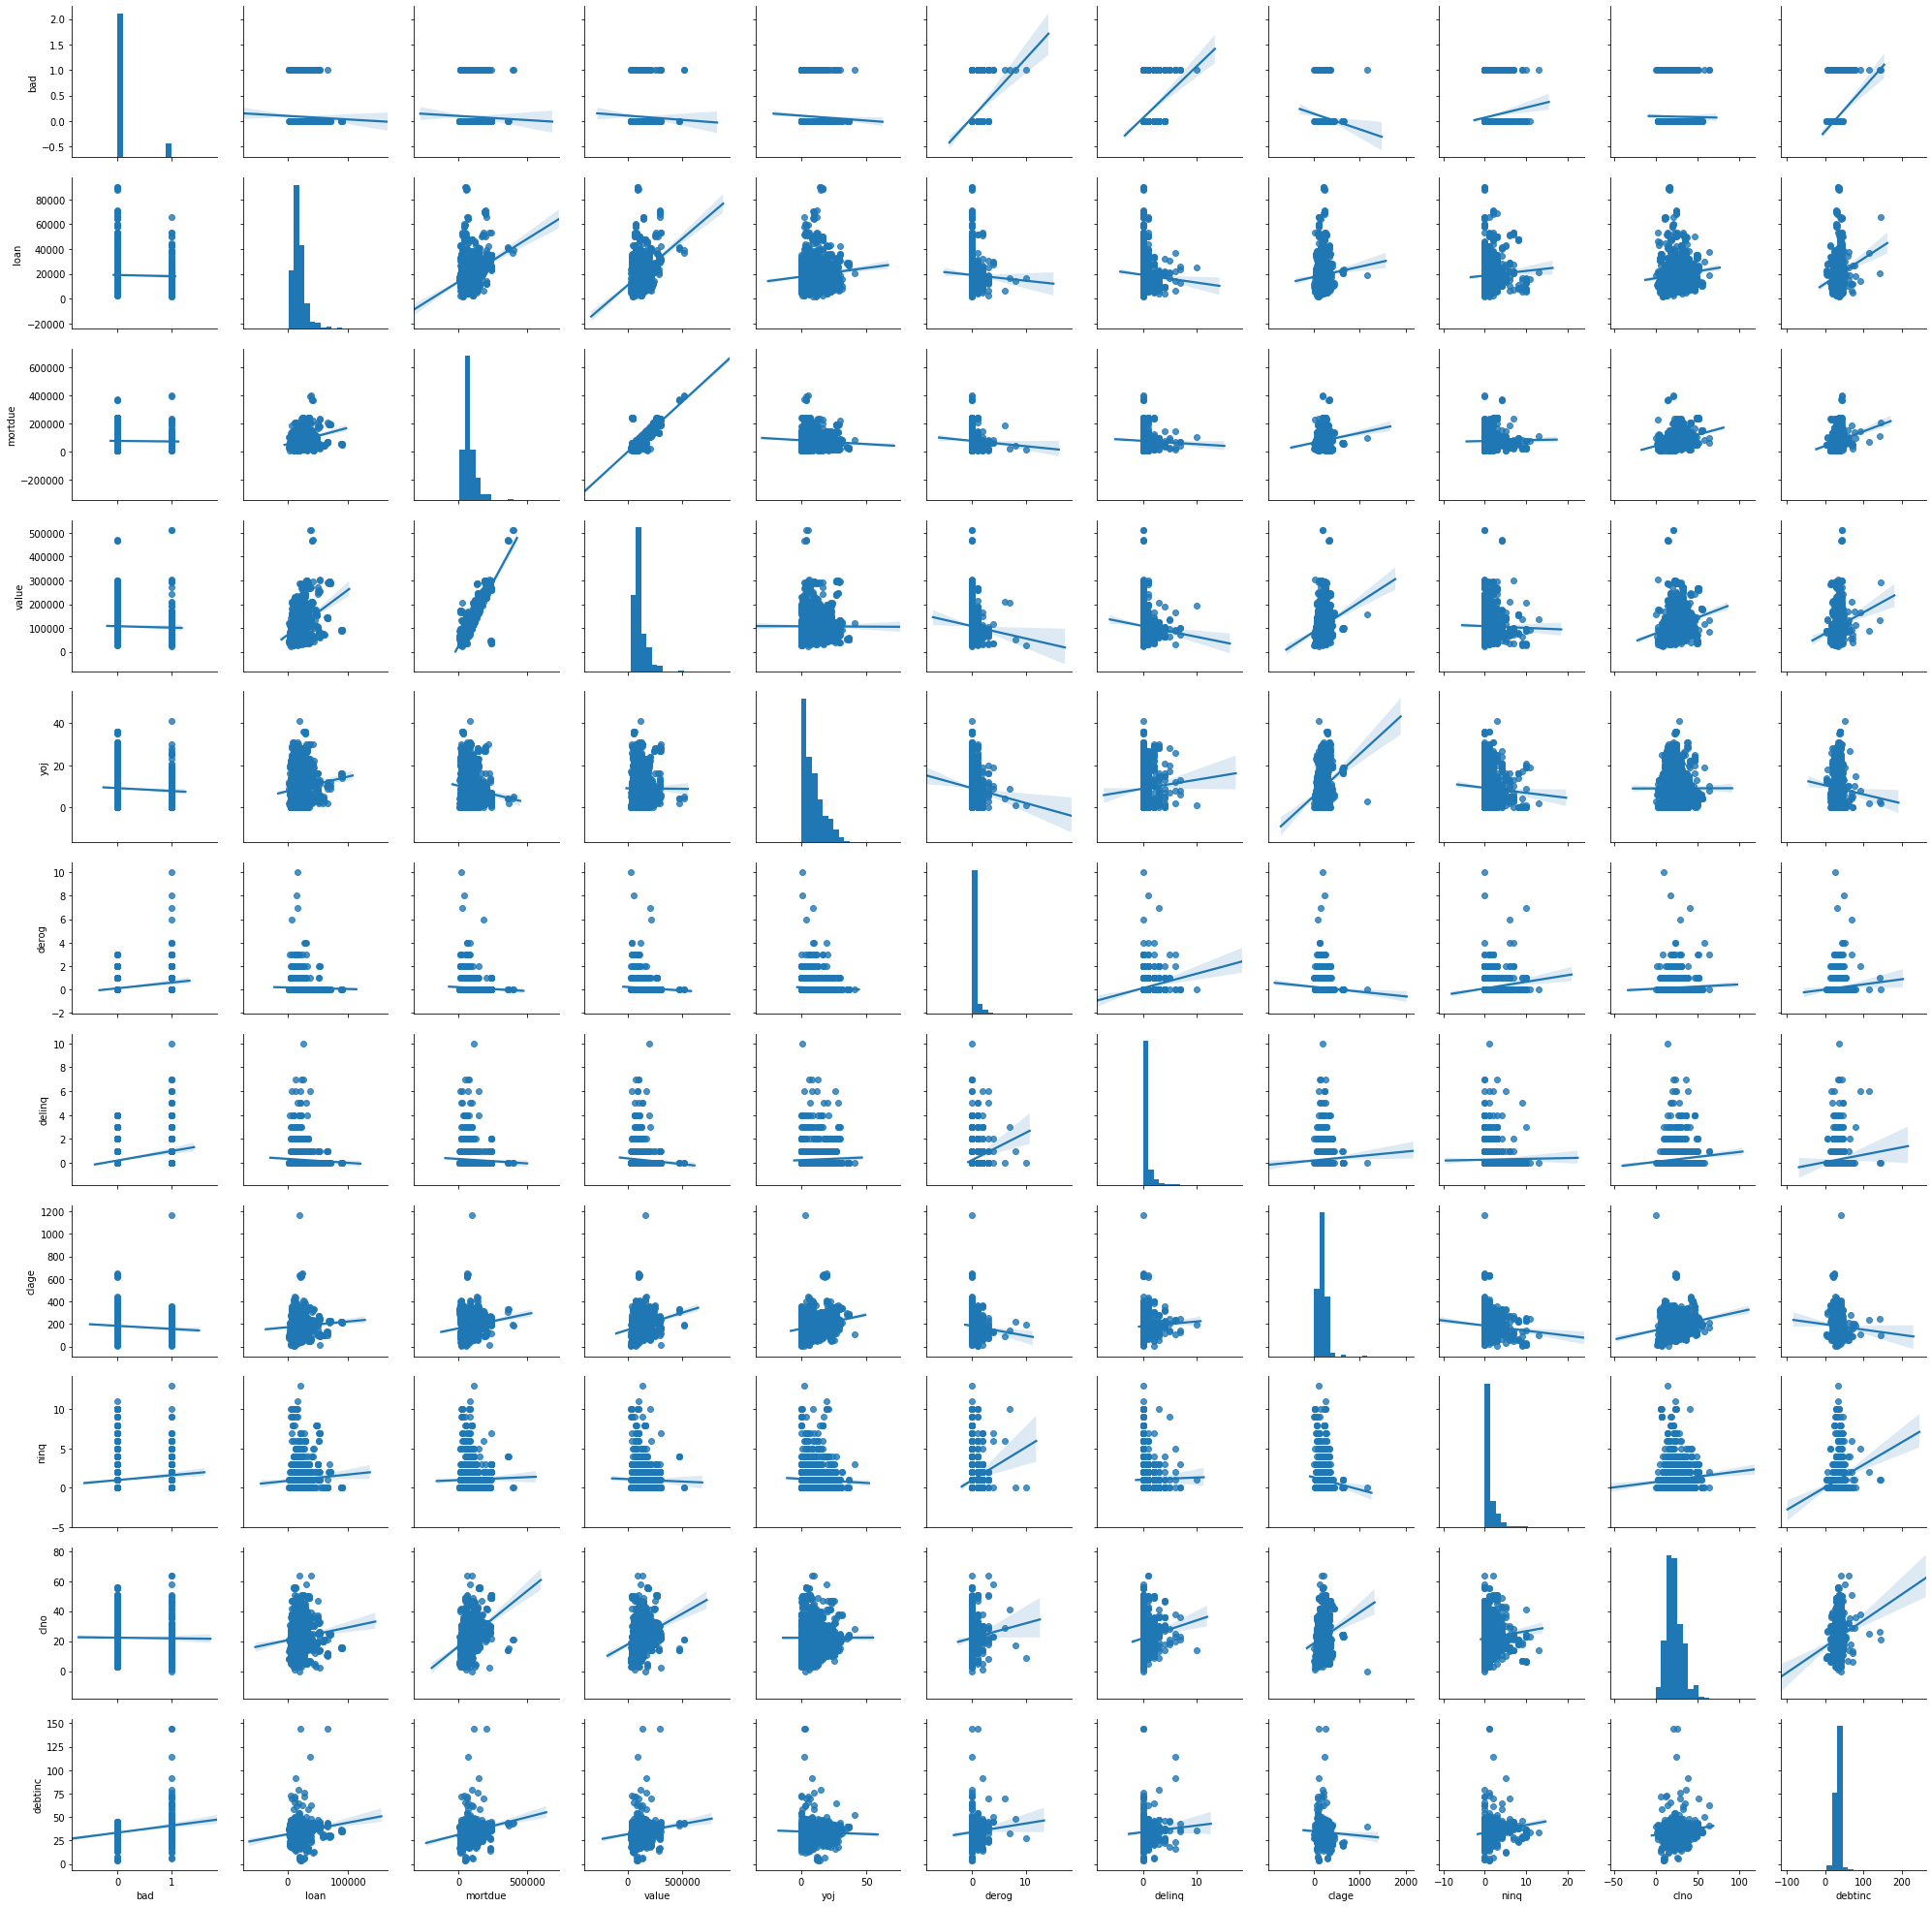

In [31]:
sns.pairplot(df,kind="reg")


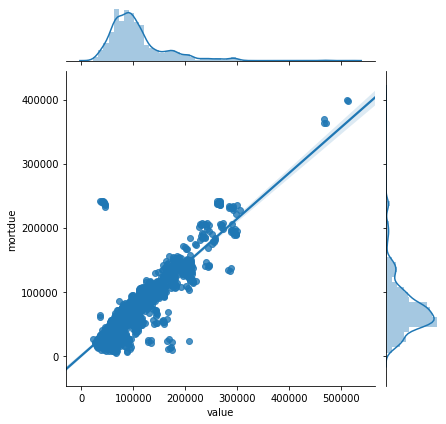

In [32]:
sns.jointplot(x="value",y="mortdue",data=df,kind="reg")

value ile mortdue ilişkili gözüküyorlar mortdue ile bir regresyon modeli oluşturularak value tahmin edilebilir mi? inceleyelim

soru: modele sokmadan önce hem value hem de mortdue normalden geliyor mu diye bakmalı mıyız?

In [33]:
print(len(df.value))
print(len(df.mortdue))
print(shapiro(df.value))
print(shapiro(df.mortdue))

2018
2018
(0.8436811566352844, 1.0142738414629458e-40)
(0.8624268174171448, 7.460412130575895e-39)


Normalden gelmiyorlar ama 30 dan fazla oldukları için normalden geldiğini varsayıyoruz.

In [45]:
X=df[["mortdue"]]
X=sm.add_constant(X)
X[0:5]


E:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [46]:
y=df["value"]
y[0:5]

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [56]:
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                          3.013e+04
Date:                Wed, 11 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:32:29   Log-Likelihood:                         -23667.
No. Observations:                2018   AIC:                                  4.734e+04
Df Residuals:                    2017   BIC:                                  4.734e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mortdue        1.3125      0.008    173.578      0.000       1.298       1.327
==============================================================================
Omnibus:                     1678.129   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147170.387
Skew:                          -3.358   Prob(JB):                         0.00
Kurtosis:                      44.294   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model beni uyardığı için multicollinearity problemi olup olmadığına bakıyorum ve olmadığını görüyorum?

In [48]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

[3.947319430795708, 1.0]

O zaman hatalarımızı incelemeye geçelim

In [ ]:
k_t=pd.DataFrame({"gercek_y":y[0:10],"tahmin_y":reg.predict(X)[0:10]})
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]
k_t["hata_kare"]=k_t["hata"]**2
k_t

In [ ]:
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))

Çok yüksek hatalar çıkıyor

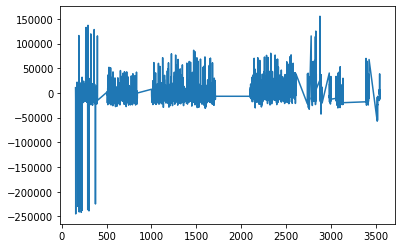

In [50]:
model.resid[0:10]
plt.plot(model.resid)

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



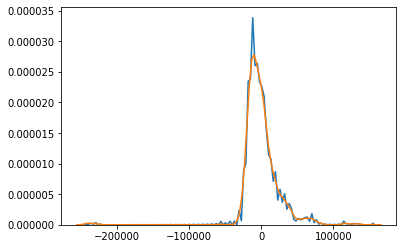

In [51]:
advres=pd.concat([ad,pd.Series(model.resid,name="resid"),pd.Series(model.predict(),name="predict")],axis=1)
sns.kdeplot(np.array(advres.resid),bw=10)
sns.distplot(np.array(advres.resid),hist=False)

In [52]:
advres = advres.dropna()
stat,p=shapiro(advres.resid)
print(stat," ",p)

0.5987489223480225   0.0


normal dağılımdan gelmiyor

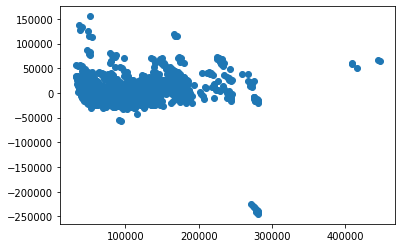

In [53]:
resid=model.resid
plt.scatter(model.predict(),resid)

rasgelelik yok